In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [51]:
df = pd.read_csv('super_store.csv')  # ,encoding = 'latin1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [52]:
df.shape

(2121, 21)

In [53]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [54]:
df['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [55]:
df1 = df[['Order Date','Sales']]
df1.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [56]:
df1['Order Date'].value_counts()

9/5/2016      10
12/1/2016      9
10/30/2017     9
11/19/2017     9
12/25/2016     9
              ..
3/25/2014      1
5/20/2015      1
8/25/2017      1
1/26/2017      1
6/14/2014      1
Name: Order Date, Length: 889, dtype: int64

In [57]:
df1 = df1.groupby(['Order Date'])['Sales'].mean().reset_index()
df1

,Order Date,Sales
0,1/1/2017,243.872500
1,1/10/2014,51.940000
2,1/10/2015,1018.104000
3,1/10/2016,52.385000
4,1/11/2014,9.940000
...,...,...
884,9/8/2016,562.496933
885,9/8/2017,333.413000
886,9/9/2014,288.008000
887,9/9/2016,15.008000


In [58]:
r = df1['Order Date'].value_counts()
r[r>1]

Series([], Name: Order Date, dtype: int64)

In [59]:
df1.head()

,Order Date,Sales
0,1/1/2017,243.8725
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,52.3850
4,1/11/2014,9.9400


In [60]:
df1.dtypes

Order Date     object
Sales         float64
dtype: object

In [61]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1.sort_values('Order Date',inplace=True)
df1.head()

,Order Date,Sales
49,2014-01-06,2573.8200
50,2014-01-07,76.7280
1,2014-01-10,51.9400
4,2014-01-11,9.9400
7,2014-01-13,439.9695


In [62]:
df1.set_index('Order Date',inplace=True)
df1.head()

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,439.9695


In [63]:
df1.head(20)

,Sales
Order Date,
2014-01-06,2573.820000
2014-01-07,76.728000
2014-01-10,51.940000
2014-01-11,9.940000
2014-01-13,439.969500
2014-01-14,61.960000
2014-01-16,127.104000
2014-01-19,181.470000
2014-01-20,282.702000


In [64]:
df2 = df1.copy()

In [65]:
df1.head()

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,439.9695


In [74]:
df3 = df2['Sales'].resample('MS').sum()
df3

Order Date
2014-01-01     4526.947500
2014-02-01      739.624667
2014-03-01     7613.739500
2014-04-01     3743.443333
2014-05-01     4390.429833
2014-06-01     7804.209600
2014-07-01     5893.565600
2014-08-01     3977.143833
2014-09-01     8573.639967
2014-10-01     6413.311750
2014-11-01     7209.694250
2014-12-01     8653.071493
2015-01-01     9824.892600
2015-02-01     1789.218667
2015-03-01     8392.004883
2015-04-01     4598.329217
2015-05-01     3672.571875
2015-06-01     5429.513667
2015-07-01     7260.098667
2015-08-01     5252.319200
2015-09-01     5829.524360
2015-10-01     5831.375833
2015-11-01     9307.929293
2015-12-01     7772.598340
2016-01-01     5683.541667
2016-02-01     2250.345167
2016-03-01     7512.678917
2016-04-01     8650.480100
2016-05-01     6403.183167
2016-06-01     6435.529633
2016-07-01     5252.366833
2016-08-01     5401.181633
2016-09-01     9514.026733
2016-10-01     4029.486267
2016-11-01     9443.653060
2016-12-01    12909.263754
2017-01-01     38

In [72]:
df4 = df2['Sales'].resample('MS').mean()
df4

Order Date
2014-01-01    348.226731
2014-02-01    147.924933
2014-03-01    447.867029
2014-04-01    267.388810
2014-05-01    274.401865
2014-06-01    410.747874
2014-07-01    327.420311
2014-08-01    248.571490
2014-09-01    357.234999
2014-10-01    400.831984
2014-11-01    327.713375
2014-12-01    432.653575
2015-01-01    818.741050
2015-02-01    298.203111
2015-03-01    524.500305
2015-04-01    353.717632
2015-05-01    244.838125
2015-06-01    301.639648
2015-07-01    382.110456
2015-08-01    328.269950
2015-09-01    306.817072
2015-10-01    306.914518
2015-11-01    387.830387
2015-12-01    353.299925
2016-01-01    378.902778
2016-02-01    204.576833
2016-03-01    357.746615
2016-04-01    455.288426
2016-05-01    291.053780
2016-06-01    402.220602
2016-07-01    308.962755
2016-08-01    317.716567
2016-09-01    396.417781
2016-10-01    212.078225
2016-11-01    377.746122
2016-12-01    496.510144
2017-01-01    253.536494
2017-02-01    227.388339
2017-03-01    235.470753
2017-04-01    

In [78]:
def kpss_test(data):
    res = kpss(data)
    print('KPSS-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]< 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [80]:
kpss_test(df3)

KPSS-Test_Stat 0.34533824625227477
p-val 0.1
H1 accepted - Data is stationary


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [81]:
kpss_test(df4)

KPSS-Test_Stat 0.1860982178099167
p-val 0.1
H1 accepted - Data is stationary


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [75]:
def adf_test(data):
    res = adfuller(data)
#     print('res',res)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [76]:
adf_test(df3)

ADF-Test_Stat -5.884858543508162
p-val 3.0182932845617726e-07
H1 accepted - Data is stationary


In [77]:
adf_test(df4)

ADF-Test_Stat -7.15016051779849
p-val 3.156384360019644e-10
H1 accepted - Data is stationary


In [83]:
print(df3.index.min())
print(df3.index.max())

2014-01-01 00:00:00
2017-12-01 00:00:00


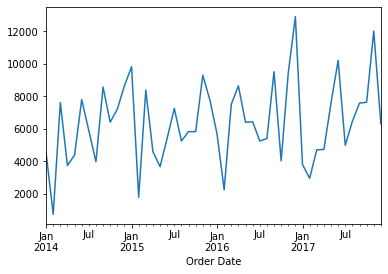

In [82]:
df3.plot()
plt.show()

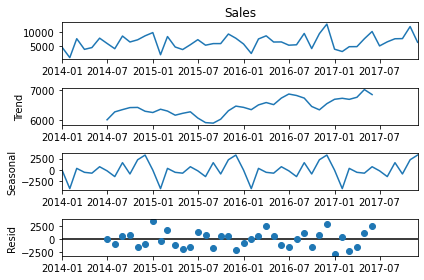

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3, model='additive')
result.plot()
plt.show()

In [85]:
df3.shape

(48,)

In [86]:
df3.head()

Order Date
2014-01-01    4526.947500
2014-02-01     739.624667
2014-03-01    7613.739500
2014-04-01    3743.443333
2014-05-01    4390.429833
Freq: MS, Name: Sales, dtype: float64

#### AutoCorrelation (ACF) and Partial Autorrelation (PACF)

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

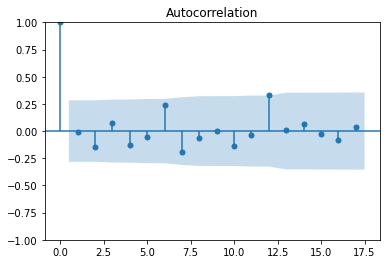

In [94]:
plot_acf(df3)
plt.show()
# q = 1

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


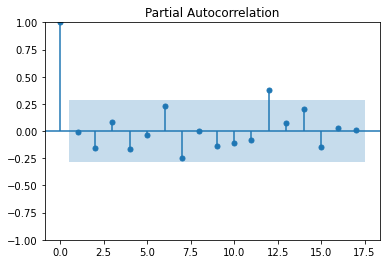

In [95]:
plot_pacf(df3)
plt.show()
# p = 1

#### Inference
(p,d,q) = (1,0,1) 

#### Data Split

In [88]:
train = df3[:42]
test = df3[42:]
print('Train_tail',train.tail())
print('Test_tail',test.head(6))

Train_tail Order Date
2017-02-01     2956.048413
2017-03-01     4709.415067
2017-04-01     4732.895833
2017-05-01     7596.854200
2017-06-01    10214.680383
Freq: MS, Name: Sales, dtype: float64
Test_tail Order Date
2017-07-01     4990.703767
2017-08-01     6466.998929
2017-09-01     7588.194140
2017-10-01     7638.449984
2017-11-01    12020.100939
2017-12-01     6303.614143
Freq: MS, Name: Sales, dtype: float64


In [89]:
print(train.shape)
print(test.shape)

(42,)
(6,)


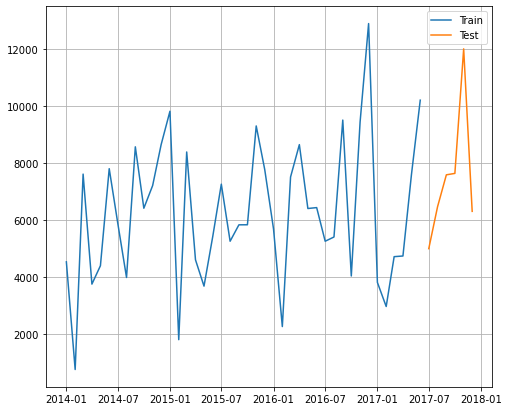

In [98]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.grid()
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [109]:
def test_metrics(test,pred):
    mse = mean_squared_error(test,pred)
    rmse = mean_squared_error(test,pred,squared=False)
#     mae = mean_squared_error(test,pred)
    mape = mean_absolute_percentage_error(test,pred)
    return mse,rmse,mape

### Model Building

### AR Model (1,0,0)

In [101]:
m1 = ARIMA(train,order=(1,0,0))
ar_m1 = m1.fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -388.050
Date:                Wed, 13 Jul 2022   AIC                            782.100
Time:                        10:59:37   BIC                            787.313
Sample:                    01-01-2014   HQIC                           784.011
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6238.0447    388.812     16.044      0.000    5475.987    7000.102
ar.L1         -0.0272      0.179     -0.152      0.879      -0.377       0.323
sigma2      6.283e+06   1.58e+06      3.969      0.0

In [102]:
fcast_m1 = ar_m1.forecast(6)
fcast_m1

2017-07-01    6129.909024
2017-08-01    6240.985175
2017-09-01    6237.964710
2017-10-01    6238.046845
2017-11-01    6238.044611
2017-12-01    6238.044672
Freq: MS, Name: predicted_mean, dtype: float64

In [100]:
test

Order Date
2017-07-01     4990.703767
2017-08-01     6466.998929
2017-09-01     7588.194140
2017-10-01     7638.449984
2017-11-01    12020.100939
2017-12-01     6303.614143
Freq: MS, Name: Sales, dtype: float64

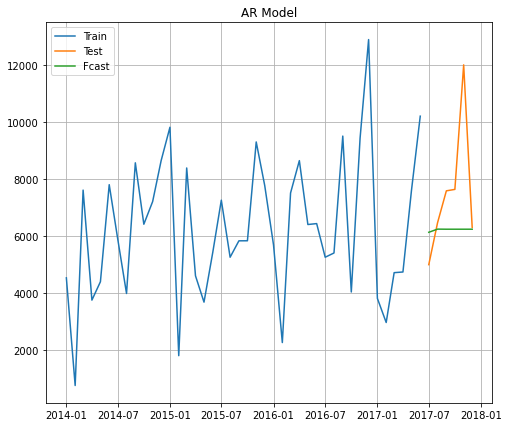

In [116]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m1,label='Fcast')
plt.title('AR Model')
plt.grid()
plt.legend()
plt.show()

In [105]:
aic_m1 = ar_m1.aic
print('AIC',aic_m1)

AIC 782.1002852297364


In [110]:
mse_m1,rmse_m1,mape_m1  = test_metrics(test,fcast_m1)

In [112]:
m1_res = pd.DataFrame({'Model':'AR','MSE':mse_m1,'RMSE':rmse_m1,
                       'MAPE':mape_m1,'AIC':aic_m1},index=[0])
m1_res

,Model,MSE,RMSE,MAPE,AIC
0,AR,6.428266e+06,2535.402468,0.185987,782.100285


#### MA Model (0,0,1)

In [114]:
m2 = ARIMA(train,order=(0,0,1))
ar_m2 = m2.fit()
print(ar_m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -388.095
Date:                Wed, 13 Jul 2022   AIC                            782.189
Time:                        11:32:29   BIC                            787.402
Sample:                    01-01-2014   HQIC                           784.100
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6238.0447    351.082     17.768      0.000    5549.936    6926.153
ma.L1         -0.0453      0.170     -0.267      0.789      -0.378       0.287
sigma2      5.768e+06   1.32e+06      4.381      0.0

In [115]:
fcast_m2 = ar_m2.forecast(6)
fcast_m2

2017-07-01    6055.105647
2017-08-01    6238.044669
2017-09-01    6238.044669
2017-10-01    6238.044669
2017-11-01    6238.044669
2017-12-01    6238.044669
Freq: MS, Name: predicted_mean, dtype: float64

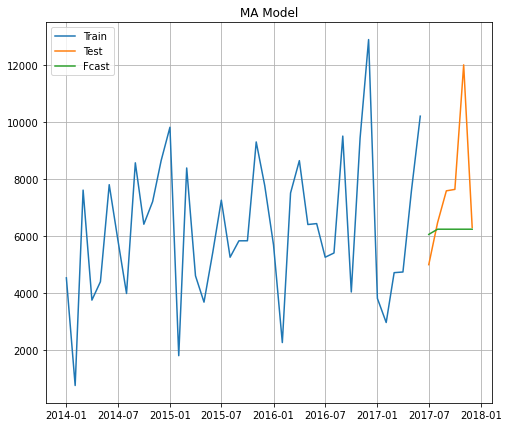

In [117]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m2,label='Fcast')
plt.title('MA Model')
plt.grid()
plt.legend()
plt.show()

In [118]:
aic_m2 = ar_m2.aic
print('AIC',aic_m2)

AIC 782.1894540975688


In [119]:
mse_m2,rmse_m2,mape_m2  = test_metrics(test,fcast_m2)

In [120]:
m2_res = pd.DataFrame({'Model':'MA','MSE':mse_m2,'RMSE':rmse_m2,
                       'MAPE':mape_m2,'AIC':aic_m2},index=[1])
m2_res

,Model,MSE,RMSE,MAPE,AIC
1,MA,6.400981e+06,2530.015946,0.183563,782.189454


In [121]:
res = pd.concat([m1_res,m2_res])
res

,Model,MSE,RMSE,MAPE,AIC
0,AR,6.428266e+06,2535.402468,0.185987,782.100285
1,MA,6.400981e+06,2530.015946,0.183563,782.189454


### ARMA (1,0,1)

In [122]:
m3 = ARIMA(train,order=(1,0,1))
ar_m3 = m3.fit()
print(ar_m3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -386.642
Date:                Wed, 13 Jul 2022   AIC                            781.284
Time:                        11:35:17   BIC                            788.235
Sample:                    01-01-2014   HQIC                           783.832
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6305.8789    112.991     55.809      0.000    6084.420    6527.338
ar.L1          0.7454      0.179      4.159      0.000       0.394       1.097
ma.L1         -0.9962      0.241     -4.133      0.0

In [123]:
fcast_m3 = ar_m3.forecast(6)
fcast_m3

2017-07-01    5331.598815
2017-08-01    5579.693406
2017-09-01    5764.612193
2017-10-01    5902.442518
2017-11-01    6005.175175
2017-12-01    6081.747576
Freq: MS, Name: predicted_mean, dtype: float64

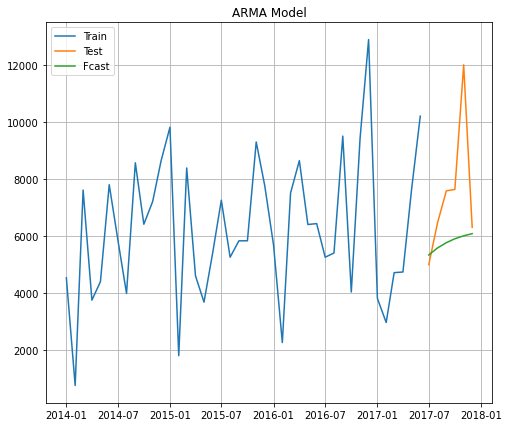

In [124]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m3,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [125]:
aic_m3 = ar_m3.aic
print('AIC',aic_m3)

AIC 781.2839120639053


In [126]:
mse_m3,rmse_m3,mape_m3  = test_metrics(test,fcast_m3)

In [127]:
m3_res = pd.DataFrame({'Model':'ARMA','MSE':mse_m3,'RMSE':rmse_m3,
                       'MAPE':mape_m3,'AIC':aic_m3},index=[2])
m3_res

,Model,MSE,RMSE,MAPE,AIC
2,ARMA,7.245208e+06,2691.692475,0.201451,781.283912


In [128]:
res1 = pd.concat([res,m3_res])
res1

,Model,MSE,RMSE,MAPE,AIC
0,AR,6.428266e+06,2535.402468,0.185987,782.100285
1,MA,6.400981e+06,2530.015946,0.183563,782.189454
2,ARMA,7.245208e+06,2691.692475,0.201451,781.283912


#### ARIMA (1,1,1)

In [129]:
m4 = ARIMA(train,order=(1,1,1))
ar_m4 = m4.fit()
print(ar_m4.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -382.394
Date:                Wed, 13 Jul 2022   AIC                            770.788
Time:                        11:46:27   BIC                            775.929
Sample:                    01-01-2014   HQIC                           772.660
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0069      0.185      0.037      0.970      -0.356       0.370
ma.L1         -0.9185      0.100     -9.215      0.000      -1.114      -0.723
sigma2        7.1e+06   1.87e+06      3.790      0.0

In [130]:
fcast_m4 = ar_m4.forecast(6)
fcast_m4

2017-07-01    6605.106485
2017-08-01    6580.080304
2017-09-01    6579.906791
2017-10-01    6579.905588
2017-11-01    6579.905579
2017-12-01    6579.905579
Freq: MS, Name: predicted_mean, dtype: float64

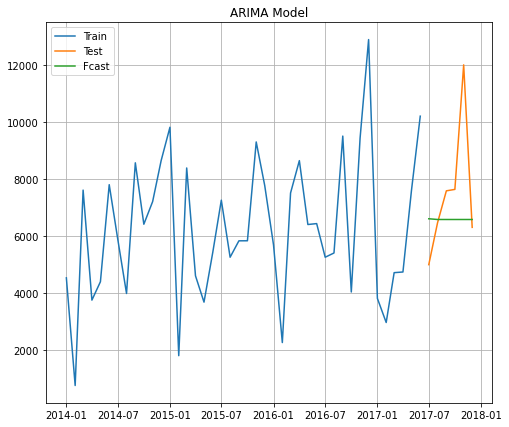

In [131]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m4,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [132]:
aic_m4 = ar_m4.aic
print('AIC',aic_m4)

AIC 770.787868566986


In [133]:
mse_m4,rmse_m4,mape_m4  = test_metrics(test,fcast_m4)

In [135]:
m4_res = pd.DataFrame({'Model':'ARIMA','MSE':mse_m4,'RMSE':rmse_m4,
                       'MAPE':mape_m4,'AIC':aic_m4},index=[3])
m4_res

,Model,MSE,RMSE,MAPE,AIC
3,ARIMA,5.738051e+06,2395.422915,0.184808,770.787869


In [136]:
res2 = pd.concat([res1,m4_res])
res2

,Model,MSE,RMSE,MAPE,AIC
0,AR,6.428266e+06,2535.402468,0.185987,782.100285
1,MA,6.400981e+06,2530.015946,0.183563,782.189454
2,ARMA,7.245208e+06,2691.692475,0.201451,781.283912
3,ARIMA,5.738051e+06,2395.422915,0.184808,770.787869


In [ ]:
# SES
# DES
# TES
# pmdarima.auto_arima
# custom_function for p,d,q for ARIMA
# custom_function for alpha,beta,gamma for Exponential Smoothing